In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
data=pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
data.shape

(303, 14)

In [3]:
data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [4]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<Axes: xlabel='target', ylabel='count'>

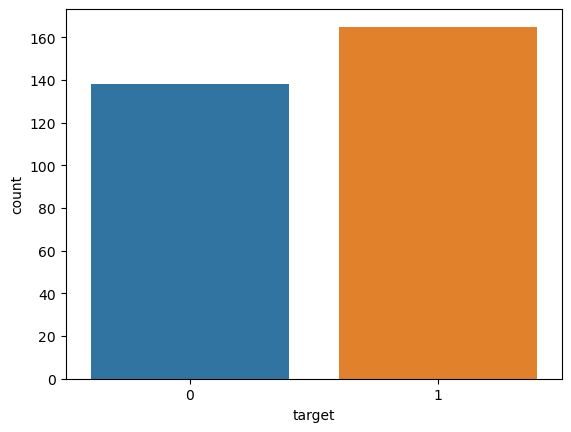

In [5]:
import seaborn as sns
sns.countplot(x=data["target"])

In [6]:
categorical_val = []
continous_val = []
for column in data.columns:
    if len(data[column].unique())<=9:
        categorical_val.append(column)
    else:
        continous_val.append(column)

In [7]:
categorical_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [8]:
continous_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

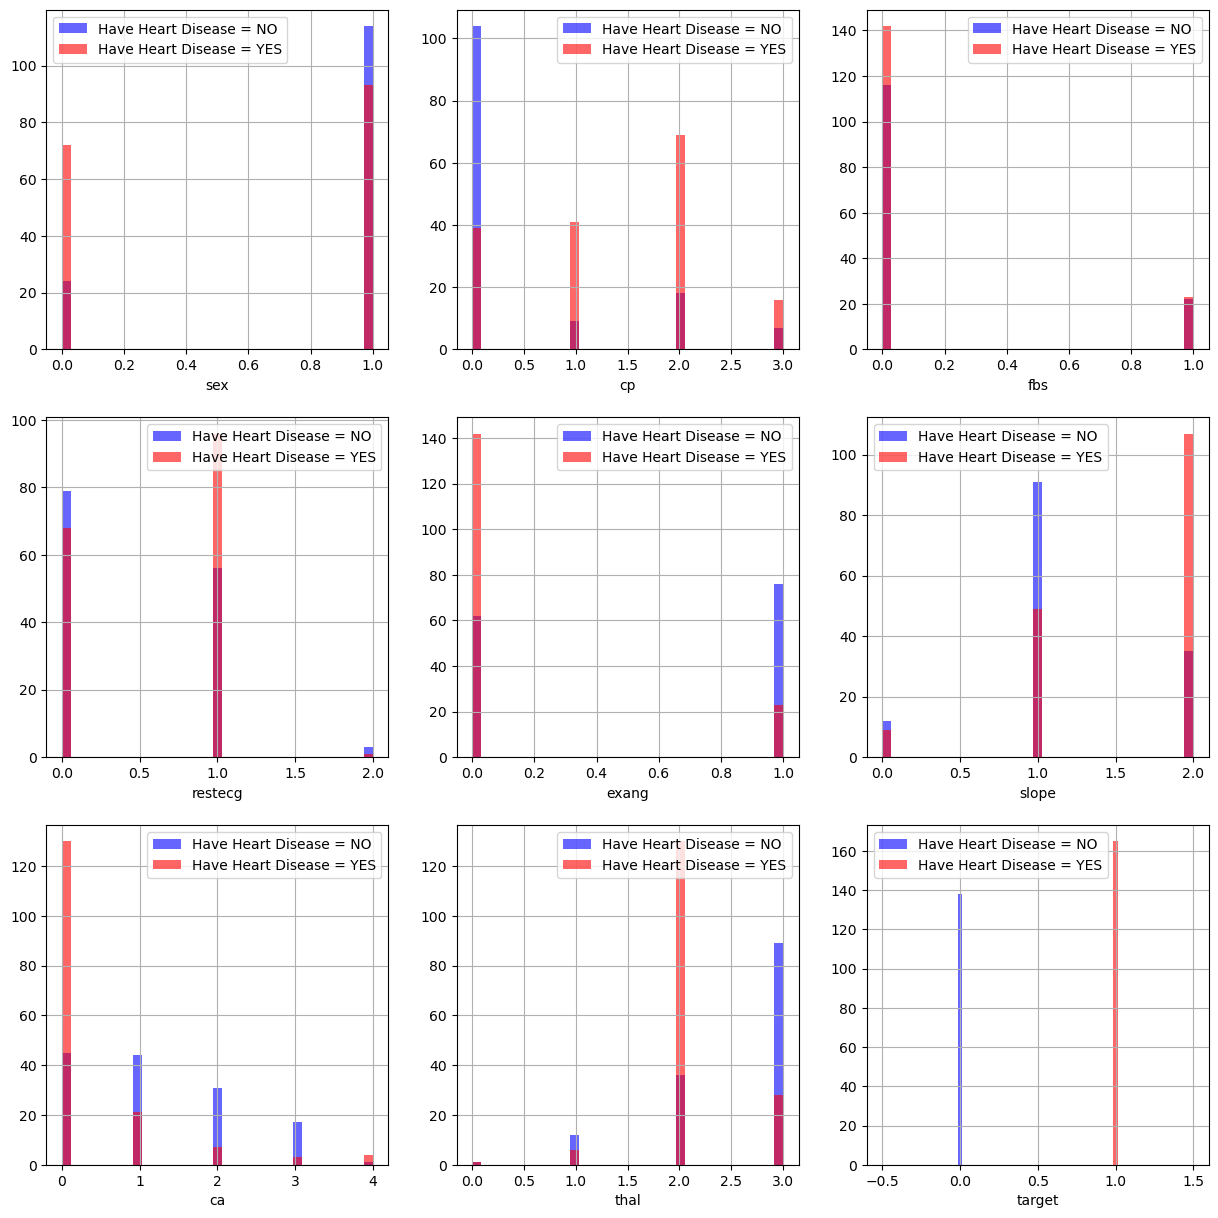

In [9]:
plt.figure(figsize=(15, 15))
for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    data[data["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    data[data["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

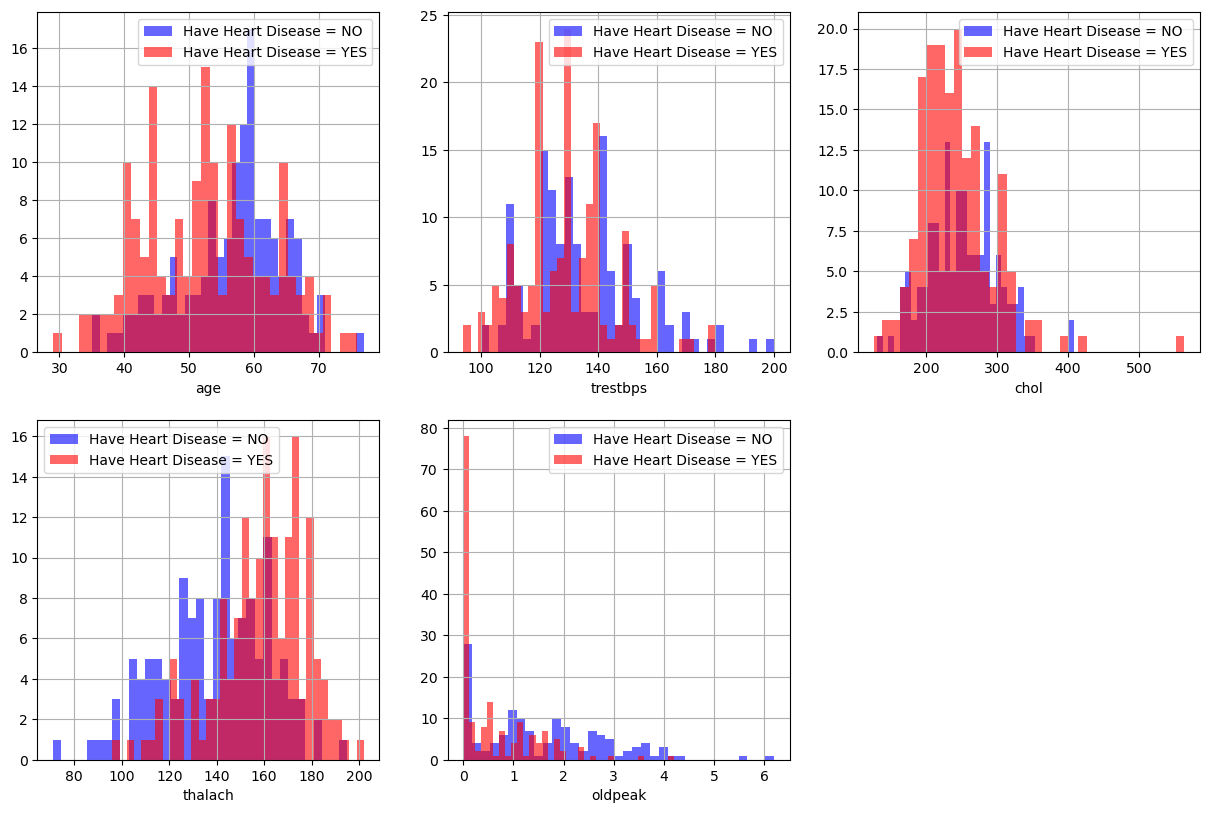

In [10]:
plt.figure(figsize=(15, 15))
for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 3, i)
    data[data["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    data[data["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

In [11]:
categorical_val.remove('target')
dataset = pd.get_dummies(data, columns = categorical_val)

In [12]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [13]:
print(data.columns)
print(dataset.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_0',
       'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')


In [14]:
from sklearn.preprocessing import StandardScaler
s_sc = StandardScaler()
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[col_to_scale] = s_sc.fit_transform(dataset[col_to_scale])

In [15]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [16]:
from sklearn.model_selection import train_test_split
X = dataset.drop('target', axis=1) #features
y = dataset.target #target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #split into train and test

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
y_pred1=lr_clf.predict(X_test)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred1))

Accuracy:  0.8571428571428571


In [18]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.87      0.80      0.84        41
           1       0.85      0.90      0.87        50

    accuracy                           0.86        91
   macro avg       0.86      0.85      0.85        91
weighted avg       0.86      0.86      0.86        91



In [19]:
print(confusion_matrix(y_test, y_pred1))

[[33  8]
 [ 5 45]]


In [20]:
#import the KNeighborsClassifier class from sklearn
from sklearn.neighbors import KNeighborsClassifier
k_range = range(1,26) #1-25
scores = {} 
scores_list = [] 
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)  #model building
        knn.fit(X_train,y_train) #training
        y_pred2=knn.predict(X_test) #testing
        scores[k] = metrics.accuracy_score(y_test,y_pred2)
        scores_list.append(metrics.accuracy_score(y_test,y_pred2))

In [21]:
scores

{1: 0.7472527472527473,
 2: 0.7142857142857143,
 3: 0.8351648351648352,
 4: 0.7802197802197802,
 5: 0.8681318681318682,
 6: 0.8241758241758241,
 7: 0.8571428571428571,
 8: 0.8571428571428571,
 9: 0.8461538461538461,
 10: 0.8571428571428571,
 11: 0.8461538461538461,
 12: 0.8571428571428571,
 13: 0.8571428571428571,
 14: 0.8461538461538461,
 15: 0.8571428571428571,
 16: 0.8461538461538461,
 17: 0.8791208791208791,
 18: 0.8571428571428571,
 19: 0.8901098901098901,
 20: 0.8681318681318682,
 21: 0.8791208791208791,
 22: 0.8571428571428571,
 23: 0.8791208791208791,
 24: 0.8571428571428571,
 25: 0.8681318681318682}

In [22]:
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train,y_train)  #model is trained
y_pred2=knn.predict(X_test)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred2))

Accuracy:  0.8901098901098901


In [23]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87        41
           1       0.87      0.94      0.90        50

    accuracy                           0.89        91
   macro avg       0.89      0.88      0.89        91
weighted avg       0.89      0.89      0.89        91



In [24]:
print(confusion_matrix(y_test, y_pred2))

[[34  7]
 [ 3 47]]


In [29]:
pickle.dump(knn, open('heartmodel.pkl', 'wb'))

In [25]:
from sklearn.svm import SVC
clf=SVC(kernel='rbf',C=100,gamma=0.001) #model creation
clf.fit(X_train,y_train) #training the model
y_pred3=clf.predict(X_test) #predicting the data using the model
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred3)) #finding the accuracy

Accuracy:  0.8681318681318682


In [26]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train,y_train)
y_pred4=clf.predict(X_test)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred4))

Accuracy:  0.7802197802197802


In [27]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=300)
clf.fit(X_train,y_train)
y_pred5=clf.predict(X_test)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred5))

Accuracy:  0.8351648351648352


In [31]:
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.1,1,10,100],
           'gamma':[1,0.1,0.01,0.001],
           'kernel':['rbf']}

In [32]:
grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.535 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.535 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.548 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.548 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.548 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.860 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.837 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.857 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.738 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.535 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=3)

In [33]:
print(grid.best_params_)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


In [34]:
print(grid.best_estimator_)

SVC(C=100, gamma=0.001)


In [47]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(criterion= 'gini', max_depth= 8, max_features= 'sqrt', n_estimators= 400)
rf_clf.fit(X_train, y_train)
y_pred4=rf_clf.predict(X_test)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred4))

Accuracy:  0.8241758241758241


In [35]:
param_grid={
    'n_estimators':[100,200,300,400,500],
    'max_features':['auto','log2','sqrt'],
    'max_depth':[4,5,6,7,8],
    'criterion':['gini','entropy']
}

In [36]:
grid=GridSearchCV(RandomForestClassifier(),param_grid,refit=True,verbose=3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=100;, score=0.907 total time=   0.2s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=100;, score=0.860 total time=   0.2s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=100;, score=0.762 total time=   0.2s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=100;, score=0.905 total time=   0.2s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=100;, score=0.762 total time=   0.2s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200;, score=0.907 total time=   0.5s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200;, score=0.814 total time=   0.6s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200;, score=0.762 total time=   0.6s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200;, score=0.905 total time=   0.6s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200;, score=0.738 total time=   0.5s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=300;, score=0.884 total time=   0.7s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=300;, score=0.837 total time=   0.7s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=300;, score=0.714 total time=   0.7s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=300;, score=0.881 total time=   0.6s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=300;, score=0.762 total time=   0.7s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=400;, score=0.930 total time=   1.3s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=400;, score=0.860 total time=   1.0s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=400;, score=0.714 total time=   0.9s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=400;, score=0.929 total time=   0.9s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=400;, score=0.738 total time=   1.0s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=500;, score=0.907 total time=   1.4s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=500;, score=0.837 total time=   1.3s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=500;, score=0.738 total time=   1.2s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=500;, score=0.929 total time=   1.2s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=500;, score=0.738 total time=   1.3s
[CV 1/5] END criterion=gini, max_depth=4, max_features=log2, n_estimators=100;, score=0.930 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=4, max_features=log2, n_estimators=100;, score=0.860 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=4, max_features=log2, n_estimators=100;, score=0.714 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=4, max_features=log2, n_estimators=100;, score=0.905 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=4, max_features=log2, n_estimators=100;, score=0.762 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=4, max_features=log2, n_estimators=200;, score=0.907 total time=   0.5s
[CV 2/5] END criterion=gini, max_depth=4, max_features=log2, n_estimators=200;, score=0.860 total time=   0.8s
[CV 3/5] END criterion=gini, max_depth=4, max_features=log2, n_estimators=200;, score=0.738 total time=   0.7s
[

C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=5, max_features=auto, n_estimators=100;, score=0.884 total time=   0.2s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=5, max_features=auto, n_estimators=100;, score=0.791 total time=   0.2s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=5, max_features=auto, n_estimators=100;, score=0.786 total time=   0.2s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=5, max_features=auto, n_estimators=100;, score=0.905 total time=   0.2s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=5, max_features=auto, n_estimators=100;, score=0.738 total time=   0.2s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=5, max_features=auto, n_estimators=200;, score=0.907 total time=   0.4s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=5, max_features=auto, n_estimators=200;, score=0.814 total time=   0.4s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=5, max_features=auto, n_estimators=200;, score=0.738 total time=   0.4s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=5, max_features=auto, n_estimators=200;, score=0.905 total time=   0.4s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=5, max_features=auto, n_estimators=200;, score=0.738 total time=   0.4s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=5, max_features=auto, n_estimators=300;, score=0.884 total time=   0.7s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=5, max_features=auto, n_estimators=300;, score=0.837 total time=   0.7s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=5, max_features=auto, n_estimators=300;, score=0.738 total time=   0.6s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=5, max_features=auto, n_estimators=300;, score=0.905 total time=   0.7s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=5, max_features=auto, n_estimators=300;, score=0.714 total time=   0.6s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=5, max_features=auto, n_estimators=400;, score=0.884 total time=   0.9s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=5, max_features=auto, n_estimators=400;, score=0.837 total time=   0.9s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=5, max_features=auto, n_estimators=400;, score=0.714 total time=   0.9s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=5, max_features=auto, n_estimators=400;, score=0.881 total time=   0.9s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=5, max_features=auto, n_estimators=400;, score=0.762 total time=   0.9s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=5, max_features=auto, n_estimators=500;, score=0.907 total time=   1.1s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=5, max_features=auto, n_estimators=500;, score=0.791 total time=   1.1s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=5, max_features=auto, n_estimators=500;, score=0.714 total time=   1.1s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=5, max_features=auto, n_estimators=500;, score=0.905 total time=   1.1s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=5, max_features=auto, n_estimators=500;, score=0.738 total time=   1.3s
[CV 1/5] END criterion=gini, max_depth=5, max_features=log2, n_estimators=100;, score=0.907 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=5, max_features=log2, n_estimators=100;, score=0.837 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=5, max_features=log2, n_estimators=100;, score=0.714 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=5, max_features=log2, n_estimators=100;, score=0.905 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=5, max_features=log2, n_estimators=100;, score=0.714 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=5, max_features=log2, n_estimators=200;, score=0.907 total time=   0.5s
[CV 2/5] END criterion=gini, max_depth=5, max_features=log2, n_estimators=200;, score=0.791 total time=   0.5s
[CV 3/5] END criterion=gini, max_depth=5, max_features=log2, n_estimators=200;, score=0.738 total time=   0.5s
[

C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=6, max_features=auto, n_estimators=100;, score=0.884 total time=   0.2s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=6, max_features=auto, n_estimators=100;, score=0.791 total time=   0.2s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=6, max_features=auto, n_estimators=100;, score=0.762 total time=   0.2s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=6, max_features=auto, n_estimators=100;, score=0.905 total time=   0.2s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=6, max_features=auto, n_estimators=100;, score=0.738 total time=   0.2s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=6, max_features=auto, n_estimators=200;, score=0.884 total time=   0.4s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=6, max_features=auto, n_estimators=200;, score=0.791 total time=   0.4s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=6, max_features=auto, n_estimators=200;, score=0.762 total time=   0.4s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=6, max_features=auto, n_estimators=200;, score=0.905 total time=   0.4s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=6, max_features=auto, n_estimators=200;, score=0.786 total time=   0.6s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=6, max_features=auto, n_estimators=300;, score=0.884 total time=   1.1s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=6, max_features=auto, n_estimators=300;, score=0.814 total time=   0.7s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=6, max_features=auto, n_estimators=300;, score=0.762 total time=   0.7s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=6, max_features=auto, n_estimators=300;, score=0.881 total time=   0.8s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=6, max_features=auto, n_estimators=300;, score=0.738 total time=   0.7s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=6, max_features=auto, n_estimators=400;, score=0.884 total time=   1.5s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=6, max_features=auto, n_estimators=400;, score=0.814 total time=   1.1s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=6, max_features=auto, n_estimators=400;, score=0.762 total time=   1.7s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=6, max_features=auto, n_estimators=400;, score=0.905 total time=   1.0s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=6, max_features=auto, n_estimators=400;, score=0.786 total time=   1.1s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=6, max_features=auto, n_estimators=500;, score=0.907 total time=   1.6s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=6, max_features=auto, n_estimators=500;, score=0.814 total time=   1.4s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=6, max_features=auto, n_estimators=500;, score=0.738 total time=   1.3s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=6, max_features=auto, n_estimators=500;, score=0.905 total time=   1.3s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=6, max_features=auto, n_estimators=500;, score=0.714 total time=   1.6s
[CV 1/5] END criterion=gini, max_depth=6, max_features=log2, n_estimators=100;, score=0.907 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=6, max_features=log2, n_estimators=100;, score=0.767 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=6, max_features=log2, n_estimators=100;, score=0.762 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=6, max_features=log2, n_estimators=100;, score=0.905 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=6, max_features=log2, n_estimators=100;, score=0.786 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=6, max_features=log2, n_estimators=200;, score=0.907 total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=6, max_features=log2, n_estimators=200;, score=0.837 total time=   0.4s
[CV 3/5] END criterion=gini, max_depth=6, max_features=log2, n_estimators=200;, score=0.786 total time=   0.4s
[

C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=7, max_features=auto, n_estimators=100;, score=0.907 total time=   0.2s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=7, max_features=auto, n_estimators=100;, score=0.814 total time=   0.3s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=7, max_features=auto, n_estimators=100;, score=0.738 total time=   0.2s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=7, max_features=auto, n_estimators=100;, score=0.881 total time=   0.3s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=7, max_features=auto, n_estimators=100;, score=0.738 total time=   0.3s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=7, max_features=auto, n_estimators=200;, score=0.907 total time=   0.6s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=7, max_features=auto, n_estimators=200;, score=0.837 total time=   0.5s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=7, max_features=auto, n_estimators=200;, score=0.786 total time=   0.5s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=7, max_features=auto, n_estimators=200;, score=0.881 total time=   0.6s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=7, max_features=auto, n_estimators=200;, score=0.762 total time=   0.5s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=7, max_features=auto, n_estimators=300;, score=0.907 total time=   0.8s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=7, max_features=auto, n_estimators=300;, score=0.814 total time=   0.8s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=7, max_features=auto, n_estimators=300;, score=0.738 total time=   0.8s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=7, max_features=auto, n_estimators=300;, score=0.905 total time=   0.8s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=7, max_features=auto, n_estimators=300;, score=0.714 total time=   1.0s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=7, max_features=auto, n_estimators=400;, score=0.884 total time=   2.0s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=7, max_features=auto, n_estimators=400;, score=0.791 total time=   2.5s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=7, max_features=auto, n_estimators=400;, score=0.762 total time=   2.9s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=7, max_features=auto, n_estimators=400;, score=0.905 total time=   3.3s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=7, max_features=auto, n_estimators=400;, score=0.762 total time=   2.8s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=7, max_features=auto, n_estimators=500;, score=0.884 total time=   4.0s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=7, max_features=auto, n_estimators=500;, score=0.814 total time=   3.4s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=7, max_features=auto, n_estimators=500;, score=0.786 total time=   3.1s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=7, max_features=auto, n_estimators=500;, score=0.881 total time=   3.4s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=7, max_features=auto, n_estimators=500;, score=0.738 total time=   3.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=log2, n_estimators=100;, score=0.907 total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=7, max_features=log2, n_estimators=100;, score=0.791 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=7, max_features=log2, n_estimators=100;, score=0.762 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=7, max_features=log2, n_estimators=100;, score=0.881 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=7, max_features=log2, n_estimators=100;, score=0.762 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=7, max_features=log2, n_estimators=200;, score=0.884 total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=7, max_features=log2, n_estimators=200;, score=0.791 total time=   0.5s
[CV 3/5] END criterion=gini, max_depth=7, max_features=log2, n_estimators=200;, score=0.762 total time=   0.9s
[

C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=8, max_features=auto, n_estimators=100;, score=0.837 total time=   0.2s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=8, max_features=auto, n_estimators=100;, score=0.814 total time=   0.2s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=8, max_features=auto, n_estimators=100;, score=0.762 total time=   0.2s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=8, max_features=auto, n_estimators=100;, score=0.881 total time=   0.2s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=8, max_features=auto, n_estimators=100;, score=0.762 total time=   0.2s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=8, max_features=auto, n_estimators=200;, score=0.884 total time=   0.4s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=8, max_features=auto, n_estimators=200;, score=0.791 total time=   0.5s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=8, max_features=auto, n_estimators=200;, score=0.810 total time=   0.4s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=8, max_features=auto, n_estimators=200;, score=0.905 total time=   0.4s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=8, max_features=auto, n_estimators=200;, score=0.762 total time=   0.5s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=8, max_features=auto, n_estimators=300;, score=0.884 total time=   0.8s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=8, max_features=auto, n_estimators=300;, score=0.767 total time=   0.7s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=8, max_features=auto, n_estimators=300;, score=0.762 total time=   0.6s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=8, max_features=auto, n_estimators=300;, score=0.905 total time=   0.7s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=8, max_features=auto, n_estimators=300;, score=0.738 total time=   0.7s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=8, max_features=auto, n_estimators=400;, score=0.884 total time=   0.9s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=8, max_features=auto, n_estimators=400;, score=0.767 total time=   0.9s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=8, max_features=auto, n_estimators=400;, score=0.762 total time=   0.9s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=8, max_features=auto, n_estimators=400;, score=0.905 total time=   0.9s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=8, max_features=auto, n_estimators=400;, score=0.738 total time=   0.9s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=8, max_features=auto, n_estimators=500;, score=0.860 total time=   1.3s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=8, max_features=auto, n_estimators=500;, score=0.791 total time=   1.3s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=8, max_features=auto, n_estimators=500;, score=0.786 total time=   1.3s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=8, max_features=auto, n_estimators=500;, score=0.905 total time=   1.2s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=8, max_features=auto, n_estimators=500;, score=0.738 total time=   1.1s
[CV 1/5] END criterion=gini, max_depth=8, max_features=log2, n_estimators=100;, score=0.860 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=8, max_features=log2, n_estimators=100;, score=0.791 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=8, max_features=log2, n_estimators=100;, score=0.762 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=8, max_features=log2, n_estimators=100;, score=0.881 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=8, max_features=log2, n_estimators=100;, score=0.738 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=8, max_features=log2, n_estimators=200;, score=0.884 total time=   0.5s
[CV 2/5] END criterion=gini, max_depth=8, max_features=log2, n_estimators=200;, score=0.814 total time=   0.4s
[CV 3/5] END criterion=gini, max_depth=8, max_features=log2, n_estimators=200;, score=0.786 total time=   0.4s
[

C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=100;, score=0.907 total time=   0.2s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=100;, score=0.791 total time=   0.2s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=100;, score=0.738 total time=   0.2s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=100;, score=0.905 total time=   0.2s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=100;, score=0.738 total time=   0.3s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=200;, score=0.907 total time=   0.5s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=200;, score=0.837 total time=   0.8s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=200;, score=0.738 total time=   0.6s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=200;, score=0.905 total time=   0.8s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=200;, score=0.762 total time=   1.0s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=300;, score=0.884 total time=   1.5s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=300;, score=0.814 total time=   0.9s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=300;, score=0.738 total time=   0.9s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=300;, score=0.929 total time=   0.9s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=300;, score=0.738 total time=   0.8s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=400;, score=0.907 total time=   1.1s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=400;, score=0.837 total time=   1.2s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=400;, score=0.714 total time=   1.0s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=400;, score=0.905 total time=   1.1s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=400;, score=0.738 total time=   1.0s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=500;, score=0.884 total time=   1.4s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=500;, score=0.837 total time=   1.3s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=500;, score=0.714 total time=   1.3s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=500;, score=0.905 total time=   1.4s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=500;, score=0.738 total time=   1.3s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=log2, n_estimators=100;, score=0.884 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=log2, n_estimators=100;, score=0.837 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=log2, n_estimators=100;, score=0.762 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=log2, n_estimators=100;, score=0.905 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=log2, n_estimators=100;, score=0.738 total time=   0.3s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=log2, n_estimators=200;, score=0.907 total time=   0.5s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=log2, n_estimators=200;, score=0.860 total time=   0.6s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=log2, n_estimators=200;, score

C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=5, max_features=auto, n_estimators=100;, score=0.884 total time=   0.2s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=5, max_features=auto, n_estimators=100;, score=0.791 total time=   0.3s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=5, max_features=auto, n_estimators=100;, score=0.738 total time=   0.3s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=5, max_features=auto, n_estimators=100;, score=0.905 total time=   0.3s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=5, max_features=auto, n_estimators=100;, score=0.762 total time=   0.3s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=5, max_features=auto, n_estimators=200;, score=0.884 total time=   0.6s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=5, max_features=auto, n_estimators=200;, score=0.814 total time=   0.6s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=5, max_features=auto, n_estimators=200;, score=0.714 total time=   0.5s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=5, max_features=auto, n_estimators=200;, score=0.881 total time=   0.5s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=5, max_features=auto, n_estimators=200;, score=0.762 total time=   0.7s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=5, max_features=auto, n_estimators=300;, score=0.884 total time=   0.9s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=5, max_features=auto, n_estimators=300;, score=0.814 total time=   0.8s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=5, max_features=auto, n_estimators=300;, score=0.714 total time=   0.9s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=5, max_features=auto, n_estimators=300;, score=0.929 total time=   0.8s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=5, max_features=auto, n_estimators=300;, score=0.714 total time=   0.7s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=5, max_features=auto, n_estimators=400;, score=0.907 total time=   1.0s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=5, max_features=auto, n_estimators=400;, score=0.767 total time=   1.1s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=5, max_features=auto, n_estimators=400;, score=0.714 total time=   1.0s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=5, max_features=auto, n_estimators=400;, score=0.905 total time=   1.1s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=5, max_features=auto, n_estimators=400;, score=0.738 total time=   1.2s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=5, max_features=auto, n_estimators=500;, score=0.907 total time=   1.4s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=5, max_features=auto, n_estimators=500;, score=0.814 total time=   1.2s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=5, max_features=auto, n_estimators=500;, score=0.738 total time=   1.4s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=5, max_features=auto, n_estimators=500;, score=0.881 total time=   1.1s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=5, max_features=auto, n_estimators=500;, score=0.738 total time=   1.4s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=log2, n_estimators=100;, score=0.884 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=log2, n_estimators=100;, score=0.814 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=log2, n_estimators=100;, score=0.714 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=log2, n_estimators=100;, score=0.881 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=log2, n_estimators=100;, score=0.762 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=log2, n_estimators=200;, score=0.884 total time=   0.4s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=log2, n_estimators=200;, score=0.814 total time=   0.3s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=log2, n_estimators=200;, score

C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=100;, score=0.837 total time=   0.2s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=100;, score=0.762 total time=   0.1s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=100;, score=0.905 total time=   0.2s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=100;, score=0.738 total time=   0.1s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=200;, score=0.907 total time=   0.4s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=200;, score=0.814 total time=   0.4s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=200;, score=0.786 total time=   0.4s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=200;, score=0.881 total time=   0.4s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=200;, score=0.738 total time=   0.4s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=300;, score=0.860 total time=   0.6s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=300;, score=0.814 total time=   0.6s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=300;, score=0.738 total time=   0.6s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=300;, score=0.929 total time=   0.6s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=300;, score=0.714 total time=   0.6s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=400;, score=0.884 total time=   0.9s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=400;, score=0.814 total time=   0.8s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=400;, score=0.714 total time=   0.9s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=400;, score=0.905 total time=   1.3s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=400;, score=0.762 total time=   0.9s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=500;, score=0.907 total time=   1.1s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=500;, score=0.814 total time=   1.1s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=500;, score=0.738 total time=   1.1s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=500;, score=0.905 total time=   1.0s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=500;, score=0.762 total time=   1.1s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=log2, n_estimators=100;, score=0.884 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=log2, n_estimators=100;, score=0.814 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=log2, n_estimators=100;, score=0.810 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=log2, n_estimators=100;, score=0.881 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=log2, n_estimators=100;, score=0.738 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=log2, n_estimators=200;, score=0.860 total time=   0.4s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=log2, n_estimators=200;, score=0.814 total time=   0.3s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=log2, n_estimators=200;, score

C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=7, max_features=auto, n_estimators=100;, score=0.884 total time=   0.1s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=7, max_features=auto, n_estimators=100;, score=0.814 total time=   0.2s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=7, max_features=auto, n_estimators=100;, score=0.738 total time=   0.1s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=7, max_features=auto, n_estimators=100;, score=0.881 total time=   0.2s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=7, max_features=auto, n_estimators=100;, score=0.714 total time=   0.1s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=7, max_features=auto, n_estimators=200;, score=0.884 total time=   0.4s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=7, max_features=auto, n_estimators=200;, score=0.814 total time=   0.4s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=7, max_features=auto, n_estimators=200;, score=0.786 total time=   0.4s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=7, max_features=auto, n_estimators=200;, score=0.857 total time=   0.4s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=7, max_features=auto, n_estimators=200;, score=0.786 total time=   0.4s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=7, max_features=auto, n_estimators=300;, score=0.884 total time=   0.6s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=7, max_features=auto, n_estimators=300;, score=0.814 total time=   0.7s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=7, max_features=auto, n_estimators=300;, score=0.762 total time=   0.6s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=7, max_features=auto, n_estimators=300;, score=0.905 total time=   0.6s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=7, max_features=auto, n_estimators=300;, score=0.714 total time=   0.6s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=7, max_features=auto, n_estimators=400;, score=0.884 total time=   0.8s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=7, max_features=auto, n_estimators=400;, score=0.814 total time=   0.8s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=7, max_features=auto, n_estimators=400;, score=0.762 total time=   0.8s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=7, max_features=auto, n_estimators=400;, score=0.905 total time=   0.8s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=7, max_features=auto, n_estimators=400;, score=0.714 total time=   0.8s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=7, max_features=auto, n_estimators=500;, score=0.860 total time=   1.1s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=7, max_features=auto, n_estimators=500;, score=0.791 total time=   1.1s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=7, max_features=auto, n_estimators=500;, score=0.762 total time=   1.1s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=7, max_features=auto, n_estimators=500;, score=0.905 total time=   1.1s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=7, max_features=auto, n_estimators=500;, score=0.786 total time=   1.1s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=log2, n_estimators=100;, score=0.884 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=log2, n_estimators=100;, score=0.814 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=log2, n_estimators=100;, score=0.762 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=log2, n_estimators=100;, score=0.881 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=log2, n_estimators=100;, score=0.738 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=log2, n_estimators=200;, score=0.884 total time=   0.3s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=log2, n_estimators=200;, score=0.837 total time=   0.4s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=log2, n_estimators=200;, score

C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=8, max_features=auto, n_estimators=100;, score=0.860 total time=   0.2s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=8, max_features=auto, n_estimators=100;, score=0.860 total time=   0.2s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=8, max_features=auto, n_estimators=100;, score=0.762 total time=   0.1s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=8, max_features=auto, n_estimators=100;, score=0.929 total time=   0.2s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=8, max_features=auto, n_estimators=100;, score=0.786 total time=   0.1s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=8, max_features=auto, n_estimators=200;, score=0.884 total time=   0.4s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=8, max_features=auto, n_estimators=200;, score=0.814 total time=   0.4s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=8, max_features=auto, n_estimators=200;, score=0.762 total time=   0.4s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=8, max_features=auto, n_estimators=200;, score=0.905 total time=   0.4s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=8, max_features=auto, n_estimators=200;, score=0.738 total time=   0.4s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=8, max_features=auto, n_estimators=300;, score=0.860 total time=   0.6s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=8, max_features=auto, n_estimators=300;, score=0.791 total time=   0.6s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=8, max_features=auto, n_estimators=300;, score=0.738 total time=   0.7s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=8, max_features=auto, n_estimators=300;, score=0.905 total time=   0.6s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=8, max_features=auto, n_estimators=300;, score=0.738 total time=   0.6s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=8, max_features=auto, n_estimators=400;, score=0.884 total time=   0.8s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=8, max_features=auto, n_estimators=400;, score=0.814 total time=   0.8s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=8, max_features=auto, n_estimators=400;, score=0.714 total time=   0.8s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=8, max_features=auto, n_estimators=400;, score=0.905 total time=   0.8s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=8, max_features=auto, n_estimators=400;, score=0.714 total time=   0.8s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=8, max_features=auto, n_estimators=500;, score=0.884 total time=   1.1s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=8, max_features=auto, n_estimators=500;, score=0.791 total time=   1.1s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=8, max_features=auto, n_estimators=500;, score=0.762 total time=   1.1s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=8, max_features=auto, n_estimators=500;, score=0.929 total time=   1.1s


C:\Users\My\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=8, max_features=auto, n_estimators=500;, score=0.738 total time=   1.1s
[CV 1/5] END criterion=entropy, max_depth=8, max_features=log2, n_estimators=100;, score=0.884 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=8, max_features=log2, n_estimators=100;, score=0.767 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=8, max_features=log2, n_estimators=100;, score=0.762 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=8, max_features=log2, n_estimators=100;, score=0.881 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=8, max_features=log2, n_estimators=100;, score=0.714 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=8, max_features=log2, n_estimators=200;, score=0.884 total time=   0.4s
[CV 2/5] END criterion=entropy, max_depth=8, max_features=log2, n_estimators=200;, score=0.837 total time=   0.4s
[CV 3/5] END criterion=entropy, max_depth=8, max_features=log2, n_estimators=200;, score

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'n_estimators': [100, 200, 300, 400, 500]},
             verbose=3)

In [37]:
print(grid.best_params_)

{'criterion': 'gini', 'max_depth': 6, 'max_features': 'log2', 'n_estimators': 200}


In [44]:
print(grid.best_estimator_)

RandomForestClassifier(max_depth=8, n_estimators=400)


In [38]:
results_df = pd.DataFrame(data=[["Logistic Regression", metrics.accuracy_score(y_test, y_pred1)]], columns=['Model', 'Accuracy'])
results_df

,Model,Accuracy
0,Logistic Regression,0.857143


In [39]:
results_df_2 = pd.DataFrame(data=[["K-nearest neighbors",metrics.accuracy_score(y_test, y_pred2)]], 
                          columns=['Model','Accuracy'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

C:\Users\My\AppData\Local\Temp\ipykernel_8244\2149871925.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


,Model,Accuracy
0,Logistic Regression,0.857143
1,K-nearest neighbors,0.890110


In [40]:
results_df_2 = pd.DataFrame(data=[["SVM",metrics.accuracy_score(y_test, y_pred3)]], 
                          columns=['Model','Accuracy'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

C:\Users\My\AppData\Local\Temp\ipykernel_8244\538427.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


,Model,Accuracy
0,Logistic Regression,0.857143
1,K-nearest neighbors,0.890110
2,SVM,0.868132


In [41]:
results_df_2 = pd.DataFrame(data=[["Random Forest",metrics.accuracy_score(y_test, y_pred4)]], 
                          columns=['Model','Accuracy'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

C:\Users\My\AppData\Local\Temp\ipykernel_8244\1453933981.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


,Model,Accuracy
0,Logistic Regression,0.857143
1,K-nearest neighbors,0.890110
2,SVM,0.868132
3,Random Forest,0.769231


In [42]:
from sklearn.metrics import roc_auc_score
score=roc_auc_score(y_test, y_pred2)
print(f"ROC AUC:{score:.4f}")

ROC AUC:0.8846


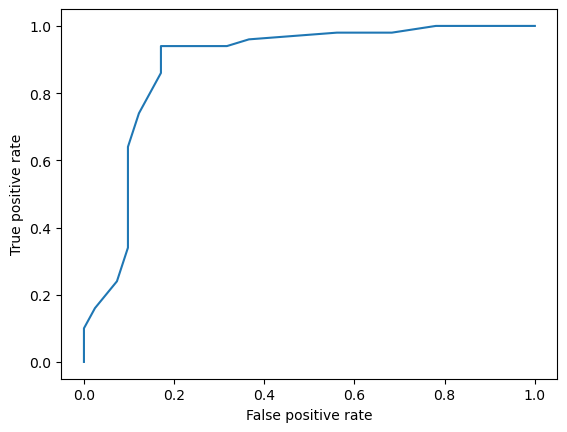

In [59]:
y_pred_proba=knn.predict_proba(X_test)[::,1]
fpr,tpr,_=metrics.roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr)
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()